In [271]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [272]:
data=pd.read_csv("/content/student_exam_data.csv")


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [274]:
print("number of row",data.shape[0])
print("number of columns",data.shape[1])

number of row 500
number of columns 3


In [275]:
data.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [276]:
data.tail()


,Study Hours,Previous Exam Score,Pass/Fail
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1
499,9.875897,66.760346,1


In [277]:
data.isnull().sum()


,0
Study Hours,0
Previous Exam Score,0
Pass/Fail,0


In [278]:
data.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [279]:
data.describe()


,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


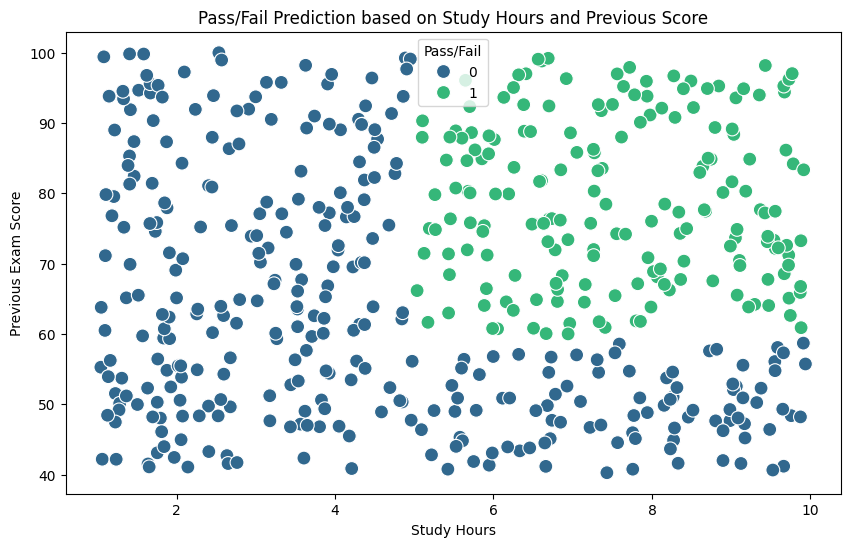

In [280]:
# Visualization of pass/fail based on study hours and previous exam score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours', y='Previous Exam Score', hue='Pass/Fail', data=data, palette='viridis', s=100)  # Fixed column names
plt.title('Pass/Fail Prediction based on Study Hours and Previous Score')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.show()

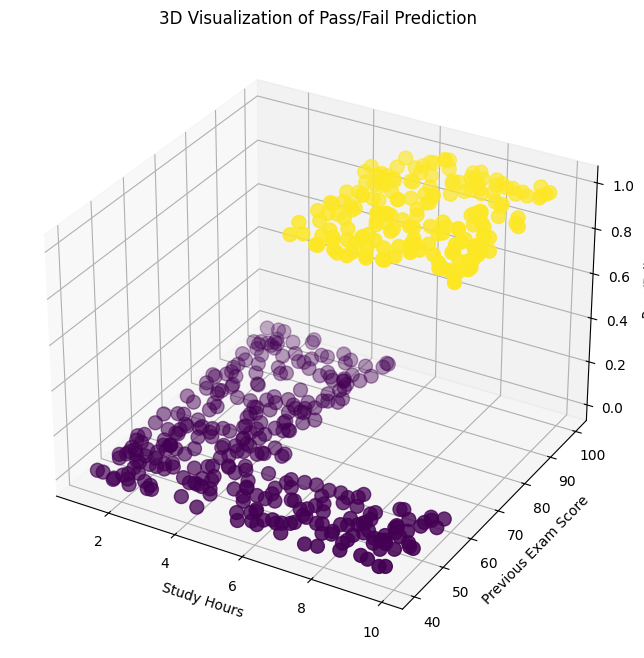

In [281]:
#visualize the data in 3D plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Study Hours', 'Previous Exam Score', and 'Pass/Fail' are your columns
x = data['Study Hours']
y = data['Previous Exam Score']
z = data['Pass/Fail']  # Or any other numerical representation of 'Pass/Fail' if needed

ax.scatter(x, y, z, c=z, cmap='viridis', s=100)  # Use z values for color mapping

ax.set_xlabel('Study Hours')
ax.set_ylabel('Previous Exam Score')
ax.set_zlabel('Pass/Fail')
ax.set_title('3D Visualization of Pass/Fail Prediction')

plt.show()

Pass/Fail
0    316
1    184
Name: count, dtype: int64
Pass/Fail
0    63.2
1    36.8
Name: count, dtype: float64


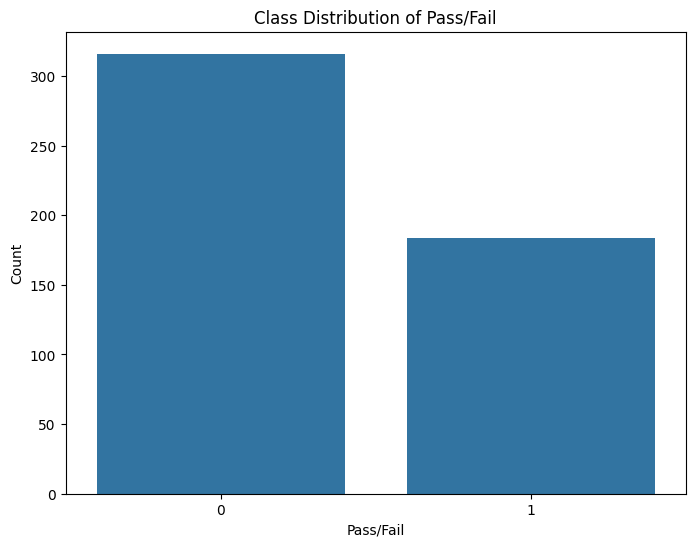

In [282]:
# Check class imbalance in 'pass/fail' column
class_counts = data['Pass/Fail'].value_counts()
print(class_counts)

# Calculate and print the percentage of each class
class_percentages = (class_counts / len(data)) * 100
print(class_percentages)

# Visualize class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Pass/Fail', data=data)
plt.title('Class Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Previous Exam Score', ylabel='Count'>

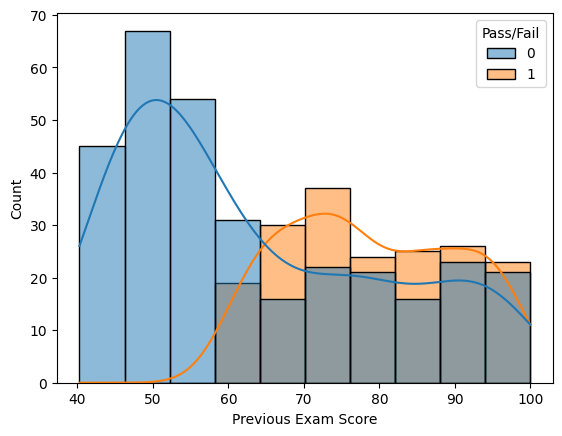

In [283]:
sns.histplot(data=data,x="Previous Exam Score",hue="Pass/Fail",kde=True, bins=10)


In [284]:
data.groupby("Pass/Fail")["Previous Exam Score"].mean()


,Previous Exam Score
Pass/Fail,
0,63.123158
1,78.867522


<Axes: xlabel='Study Hours', ylabel='Count'>

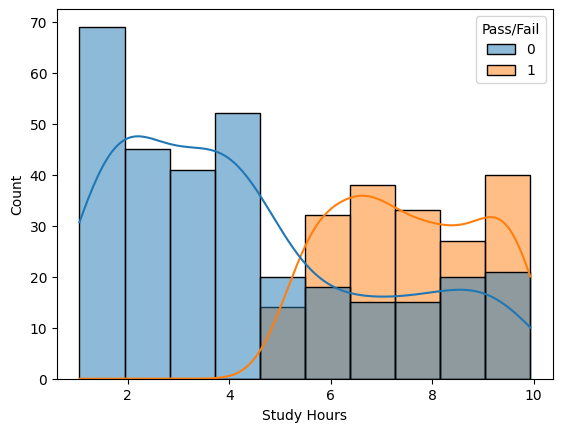

In [285]:
sns.histplot(data=data, x="Study Hours", hue="Pass/Fail", bins=10, kde=True)


In [286]:
data.groupby("Pass/Fail")["Study Hours"].mean()


,Study Hours
Pass/Fail,
0,4.291317
1,7.540606


<Axes: ylabel='Study Hours'>

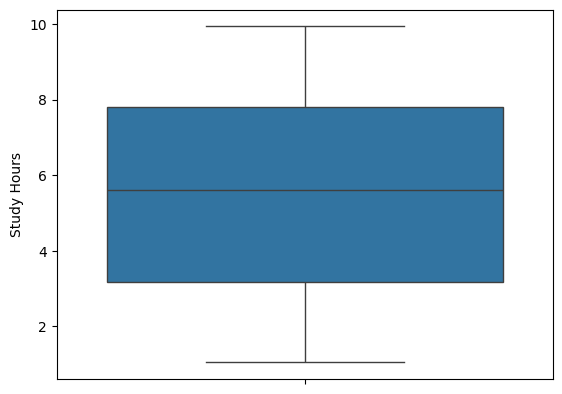

In [287]:
sns.boxplot(data["Study Hours"])


<Axes: ylabel='Previous Exam Score'>

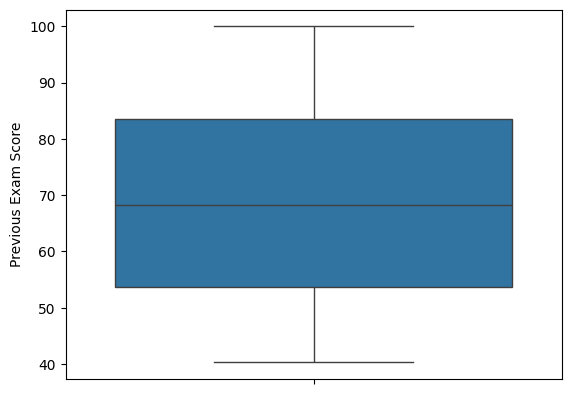

In [288]:
sns.boxplot(data["Previous Exam Score"])


<Axes: >

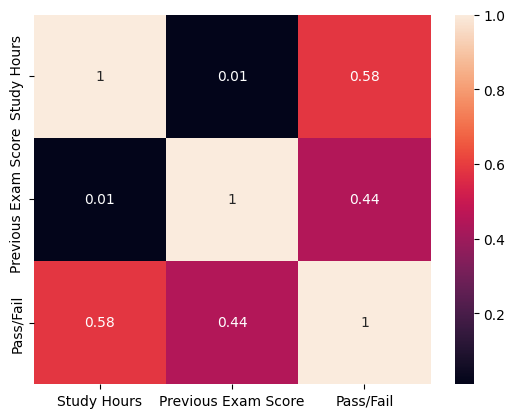

In [289]:
sns.heatmap(data.corr(),annot=True)


In [290]:
X=data.drop(columns=["Pass/Fail"],axis=1)
Y=data["Pass/Fail"]

In [291]:
column=["Study Hours","Previous Exam score"]


In [292]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [293]:
Y_train.value_counts()


,count
Pass/Fail,
0,255
1,145


In [294]:
!pip install imblearn


In [295]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=10)

In [296]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
Y_train_os.value_counts()

,count
Pass/Fail,
1,255
0,255


In [297]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_os,Y_train_os)


KNeighborsClassifier()

In [298]:
KNN_pred = KNN.predict(X_test)
KNN_cm= confusion_matrix(Y_test,KNN_pred)
KNN_acc= accuracy_score(Y_test,KNN_pred)*100
KNN_prec=precision_score(Y_test,KNN_pred)*100
KNN_rec=recall_score(Y_test,KNN_pred)*100
KNN_f1=f1_score(Y_test,KNN_pred)*100
print("accuracy_score: ", KNN_acc)
print("precision_score: ", KNN_prec)
print("recall_score: ", KNN_rec)
print("f1_score: ", KNN_f1)
print("confusion_matrix: \n", KNN_cm)

accuracy_score:  98.0
precision_score:  97.43589743589743
recall_score:  97.43589743589743
f1_score:  97.43589743589743
confusion_matrix: 
 [[60  1]
 [ 1 38]]


In [299]:
print(classification_report(Y_test,KNN_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        39

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [300]:
log=LogisticRegression()
log.fit(X_train_os,Y_train_os)

LogisticRegression()

In [301]:
log_pred = log.predict(X_test)
log_cm= confusion_matrix(Y_test,log_pred)
log_acc= accuracy_score(Y_test,log_pred)*100
log_prec=precision_score(Y_test,log_pred)*100
log_rec=recall_score(Y_test,log_pred)*100
log_f1=f1_score(Y_test,log_pred)*100
print("accuracy_score: ", log_acc)
print("precision_score: ", log_prec)
print("recall_score: ", log_rec)
print("f1_score: ", log_f1)
print("confusion_matrix: \n", log_cm)

accuracy_score:  87.0
precision_score:  78.26086956521739
recall_score:  92.3076923076923
f1_score:  84.70588235294117
confusion_matrix: 
 [[51 10]
 [ 3 36]]


In [302]:
print(classification_report(Y_test,log_pred))


              precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.78      0.92      0.85        39

    accuracy                           0.87       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [303]:
svm=SVC()
svm.fit(X_train_os, Y_train_os)


SVC()

In [304]:
svm_pred = svm.predict(X_test)
svm_cm= confusion_matrix(Y_test,svm_pred)
svm_acc= accuracy_score(Y_test,svm_pred)*100
svm_prec=precision_score(Y_test,svm_pred)*100
svm_rec=recall_score(Y_test,svm_pred)*100
svm_f1=f1_score(Y_test,svm_pred)*100
print("accuracy_score: ", svm_acc)
print("precision_score: ", svm_prec)
print("recall_score: ", svm_rec)
print("f1_score: ", svm_f1)
print("confusion_matrix: \n", svm_cm)

accuracy_score:  92.0
precision_score:  84.44444444444444
recall_score:  97.43589743589743
f1_score:  90.47619047619048
confusion_matrix: 
 [[54  7]
 [ 1 38]]


In [305]:
print(classification_report(Y_test,svm_pred))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



In [306]:
# table to represent the accuracy, precision, recall , f1 score of each model

data = {'Model': ['KNN', 'Logistic Regression', 'SVM'],
        'Accuracy': [KNN_acc, log_acc, svm_acc],
        'Precision': [KNN_prec, log_prec, svm_prec],
        'Recall': [KNN_rec, log_rec, svm_rec],
        'F1 Score': [KNN_f1, log_f1, svm_f1]}
df = pd.DataFrame(data)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,98.0,97.435897,97.435897,97.435897
1,Logistic Regression,87.0,78.260870,92.307692,84.705882
2,SVM,92.0,84.444444,97.435897,90.476190


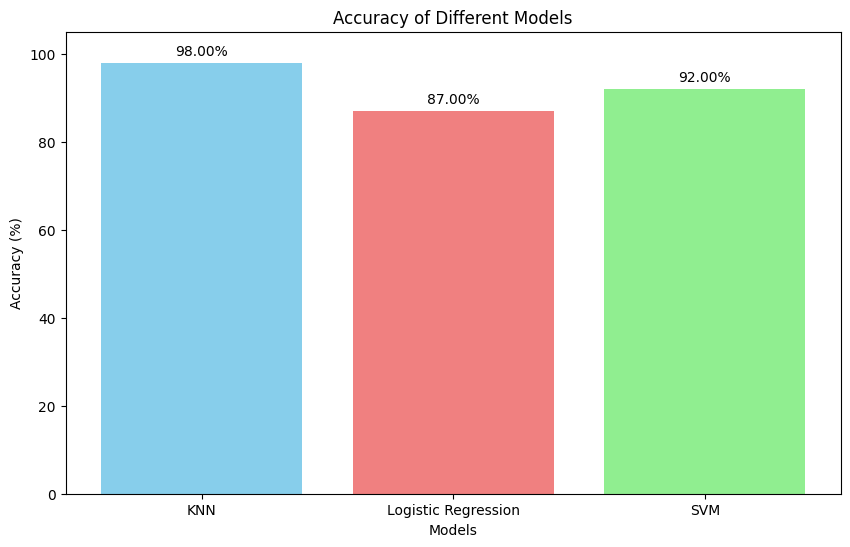

In [307]:
# represent the accueaccuracy of each model on plot

import matplotlib.pyplot as plt

# Assuming KNN_acc, log_acc, svm_acc are defined as in your previous code
models = ['KNN', 'Logistic Regression', 'SVM']
accuracy_scores = [KNN_acc, log_acc, svm_acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Different Models")
plt.ylim(0, 105)  # Set y-axis limit for better visualization

# Add accuracy values on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [308]:
#check it with custom input and the prediction

import numpy as np

# Example custom input (replace with your actual input)
custom_input = np.array([[5, 65]])  # Example: 8 study hours, 75 previous exam score

# Predict using the trained models
knn_prediction = KNN.predict(custom_input)[0]
log_prediction = log.predict(custom_input)[0]
svm_prediction = svm.predict(custom_input)[0]

print("Custom Input:", custom_input)
print("KNN Prediction:", knn_prediction)
print("Logistic Regression Prediction:", log_prediction)
print("SVM Prediction:", svm_prediction)

Custom Input: [[ 5 65]]
KNN Prediction: 1
Logistic Regression Prediction: 0
SVM Prediction: 0
